In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

Building LSTM Model


In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 32103.3652
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 31757.2656
Epoch 3/300
1/1 [==============================] - 0s 16ms/step - loss: 31316.6895
Epoch 4/300
1/1 [==============================] - 0s 17ms/step - loss: 30962.8535
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 30606.9590
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 30285.8496
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 30010.0996
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 29770.2441
Epoch 9/300
1/1 [==============================] - 0s 18ms/step - loss: 29552.1191
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 29346.2090
Epoch 11/300
1/1 [==============================] - 0s 17ms/step - loss: 29147.0254
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 28949.5469
Epo

Predicting For the next 10 data


In [14]:
import numpy as np
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[220.8983]
1 day input [196.         210.         220.89830017]
1 day output [[231.63171]]
2 day input [210.         220.89830017 231.63171387]
2 day output [[244.02693]]
3 day input [220.8983  231.63171 244.02693]
3 day output [[255.15215]]
4 day input [231.63171 244.02693 255.15215]
4 day output [[266.97614]]
5 day input [244.02693 255.15215 266.97614]
5 day output [[279.34033]]
6 day input [255.15215 266.97614 279.34033]
6 day output [[291.52454]]
7 day input [266.97614 279.34033 291.52454]
7 day output [[304.37433]]
8 day input [279.34033 291.52454 304.37433]
8 day output [[317.56732]]
9 day input [291.52454 304.37433 317.56732]
9 day output [[331.05783]]
[220.8983, 231.63171, 244.02693, 255.15215, 266.97614, 279.34033, 291.52454, 304.37433, 317.56732, 331.05783]


In [15]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [16]:
len(timeseries_data)

9

In [17]:
lst_output

[220.8983,
 231.63171,
 244.02693,
 255.15215,
 266.97614,
 279.34033,
 291.52454,
 304.37433,
 317.56732,
 331.05783]

Visualizaing The Output

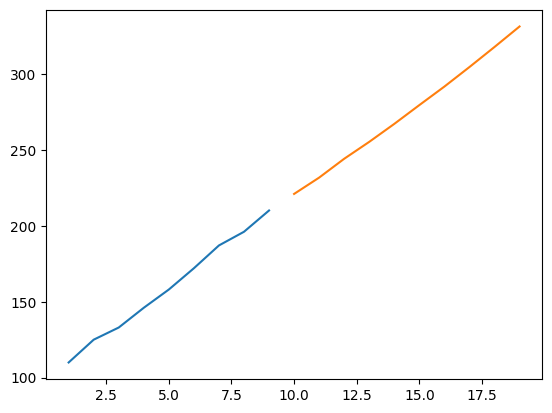

In [19]:
import matplotlib.pyplot as plt

day_new=np.arange(1,10)
day_pred=np.arange(10,20)


plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
